<a href="https://colab.research.google.com/github/halycia/Treinamento-CIS---1-Periodo-Regressao-e-Classificacao/blob/main/Treinamento_CIS_1%C2%BA_Per%C3%ADodo_(Regress%C3%A3o_e_Classifica%C3%A7%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento CIS - 1º Período (Regressão e Classificação)

## Importação e conhecendo o dataset


Importação das bibliotecas usadas

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Importação do dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality-red.csv", sep=';')

Explorando o dataset: são 12 colunas, todas do tipo de dado float de 64 bits, exceto a última, que é um inteiro de 64 bits. Além disso, essa última coluna representa a variável de saída, baseada em dados sensoriais.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Identificação dos valores no dataset

count: O número de valores não nulos na coluna.

mean: A média dos valores na coluna.

std: O desvio padrão dos valores na coluna.

min: O valor mínimo na coluna.

25%: O percentil 25 (ou quartil 1) dos valores na coluna.

50%: O percentil 50 (ou mediana) dos valores na coluna.

75%: O percentil 75 (ou quartil 3) dos valores na coluna.

max: O valor máximo na coluna.

Limitarei a visualização a 3 casas decimais para facilitar a visualização dos valores. De antemão, já é possível atestar algumas informações:
* as variáveis apresentam faixas variadas e algumas (como açúcar residual e dióxido de enxofre total) parecem ter possíveis outliers;
* A qualidade dos vinhos está distribuída entre 3 e 8, com média em torno de 5.6;
* As escalas e dispersões das variáveis variam bastante, o que indica a necessidade de normalização para modelos de Machine Learning, se for o caso;
* As diferenças pequenas entre 25%, 50% e 75% em algunas colunas sugerem que grande parte dos dados está concentrada numa faixa pequena—exceto onde o máximo sobe abruptamente (como residual sugar, reforçando a suspeita de outliers).

In [ ]:
with pd.option_context("float_format", "{:.4f}".format):
  display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000
mean,8.3196,0.5278,0.2710,2.5388,0.0875,15.8749,46.4678,0.9967,3.3111,0.6581,10.4230,5.6360
std,1.7411,0.1791,0.1948,1.4099,0.0471,10.4602,32.8953,0.0019,0.1544,0.1695,1.0657,0.8076
min,4.6000,0.1200,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000,3.0000
25%,7.1000,0.3900,0.0900,1.9000,0.0700,7.0000,22.0000,0.9956,3.2100,0.5500,9.5000,5.0000
50%,7.9000,0.5200,0.2600,2.2000,0.0790,14.0000,38.0000,0.9968,3.3100,0.6200,10.2000,6.0000
75%,9.2000,0.6400,0.4200,2.6000,0.0900,21.0000,62.0000,0.9978,3.4000,0.7300,11.1000,6.0000
max,15.9000,1.5800,1.0000,15.5000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000,8.0000


Identificação da quantidade de dados ausentes em cada coluna: não há dados ausentes

In [ ]:
df.isnull().sum()

,0
"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality""",0


Utilizarei o método IQR para identificar outliers, a fim de preservar a integridade da análise estatística, já que ele não é afetado por distribuições assimétricas, comuns na presença de outliers.

Utilizarei as funções find_outliers() e summarize_outliers() para analisar cada variável.

In [ ]:
def find_outliers(coluna):
  """
      Encontra e imprime os outliers de uma coluna específica de um DataFrame através do IQR.

    Parâmetro
    coluna : str
        O nome da coluna no DataFrame a ser plotada.
    Retorna
    int : a quantidade de outliers na coluna.
  """
  pd.set_option("display.expand_frame_repr", False)
  q1 = df[coluna].quantile(0.25)
  q3 = df[coluna].quantile(0.75)
  iqr = q3 - q1
  outliers = df[(df[coluna] < q1 - 1.5 * iqr) | (df[coluna] > q3 + 1.5 * iqr)]
  print(f"Outliers na coluna '{coluna}':")
  print(outliers)
  print("\n")
  return len(outliers)

In [ ]:
def summarize_outliers(*colunas):
    """
    Organiza em uma tabela a soma de outliers para as colunas especificadas.

    Parâmetros
    ----------
    df : DataFrame
        O DataFrame que contém as colunas.
    *colunas : str
        Os nomes das colunas no DataFrame a serem analisadas.

    Retorna
    -------
    DataFrame
        Um DataFrame com a soma de outliers para cada coluna.
    """
    outlier_counts = {coluna: find_outliers(coluna) for coluna in colunas}
    summary_df = pd.DataFrame(list(outlier_counts.items()), columns=['Coluna', 'Quantidade de Outliers'])
    return summary_df

In [ ]:
summarize_outliers("fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality")

Outliers na coluna 'fixed acidity':
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
205            12.8             0.300         0.74             2.6      0.095                  9.0                  28.0  0.99940  3.20       0.77     10.8        7
206            12.8             0.300         0.74             2.6      0.095                  9.0                  28.0  0.99940  3.20       0.77     10.8        7
243            15.0             0.210         0.44             2.2      0.075                 10.0                  24.0  1.00005  3.07       0.84      9.2        7
244            15.0             0.210         0.44             2.2      0.075                 10.0                  24.0  1.00005  3.07       0.84      9.2        7
264            12.5             0.560         0.49             2.4      0.064                  5.0                  27.0  0.99990  3.08    

,Coluna,Quantidade de Outliers
0,fixed acidity,49
1,volatile acidity,19
2,citric acid,1
3,residual sugar,155
4,chlorides,112
5,free sulfur dioxide,30
6,total sulfur dioxide,55
7,density,45
8,pH,35
9,sulphates,59


## Pré-Processamento

Análise Exploratória:

Visualize a distribuição das variáveis (usando sns.histplot, sns.boxplot, etc.).
Analise correlações (df.corr(), sns.heatmap), principalmente com a variável target (quality).


### Análise Exploratória de Dados (EDA)

Para cada variável:

Para mostrar a distribuição geral dos dados e identificar padrões, como normalidade, assimetria e multimodalidade, utilizarei histograma.

Para mostrar a mediana, a dispersão, os quartis e possíveis outliers, utilizarei o boxplot.

In [24]:
def plot_all_columns(df, bins=10, ticks=5.0):
    cols = df.columns
    for coluna in cols:
        if pd.api.types.is_numeric_dtype(df[coluna]):
            print(f"Coluna: {coluna}")
            box_hist_plot(df, coluna, bins=bins, ticks=ticks)

def box_hist_plot(df, coluna, bins=10, ticks=5.0):
    """
    Gera um boxplot e um histograma para uma coluna específica de um DataFrame.

    Parâmetros:
    df : DataFrame
        df de entrada.
    coluna : str
        O nome da coluna no DataFrame a ser plotada.
    bins : int, opcional
        O número de intervalos a ser usado no histograma. O padrão é 10.
    ticks : float, opcional
        []

    """

    fig, (ax1, ax2) = plt.subplots(
        2, 1, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85), "hspace": 0.02}
    )

    sns.boxplot(
        x=coluna,
        data=df,
        ax=ax1,
        showmeans=True,
        meanline=True,
        meanprops={"color": "C1", "linestyle": "--", "linewidth": 1},
    )
    sns.histplot(x=coluna, data=df, bins=bins, kde=True, ax=ax2)

    ax2.xaxis.set_major_locator(mtick.MultipleLocator(base=ticks))
    ax2.tick_params(axis="x", rotation=90)

    for ax in (ax1, ax2):
        ax.grid(True, linestyle="--", color="gray", alpha=0.5)
        ax.set_axisbelow(True)

    ax2.axvline(df[coluna].mean(), color="C1", linestyle="--", label="Média")
    ax2.axvline(df[coluna].median(), color="C2", linestyle="--", label="Mediana")
    ax2.axvline(df[coluna].mode()[0], color="C3", linestyle="--", label="Moda")

    ax2.legend()

    plt.show()


Coluna: fixed acidity


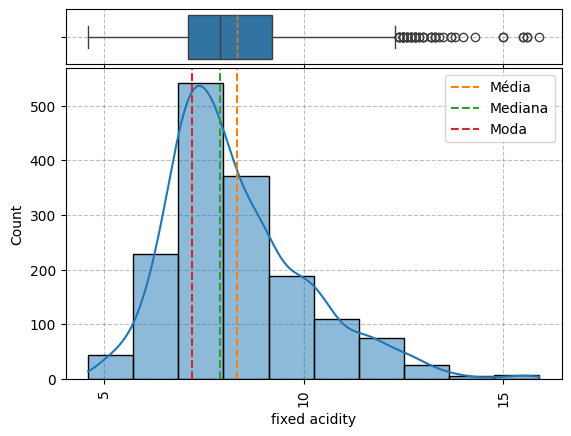

Coluna: volatile acidity


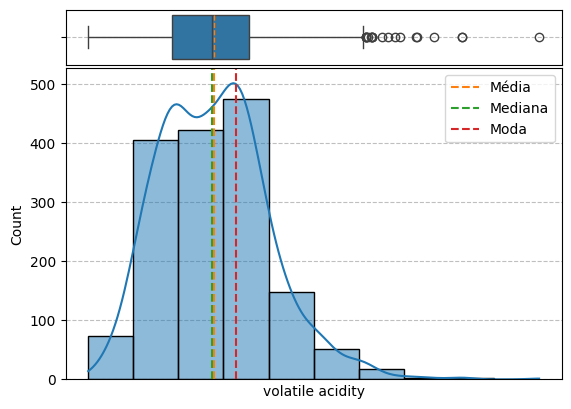

Coluna: citric acid


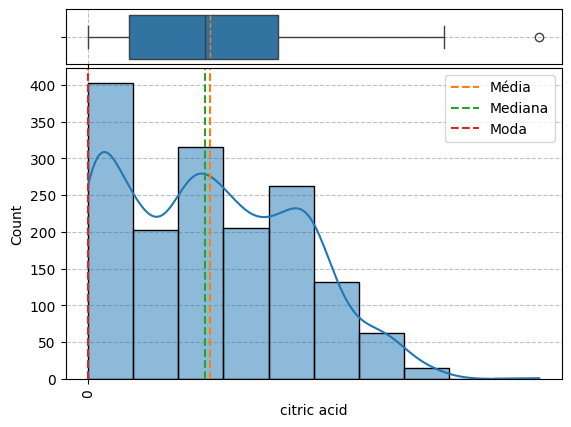

Coluna: residual sugar


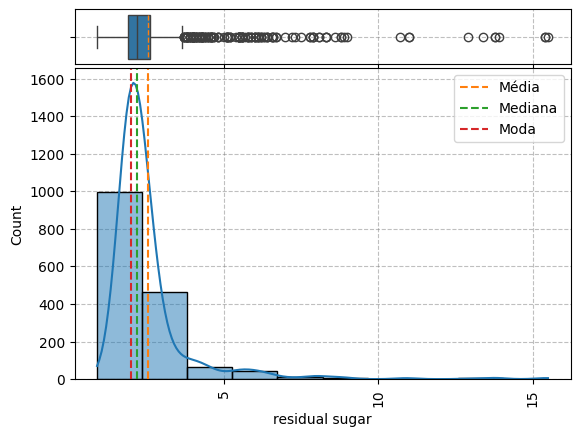

Coluna: chlorides


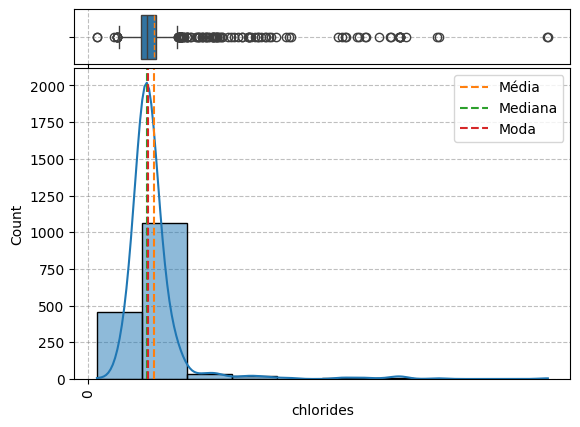

Coluna: free sulfur dioxide


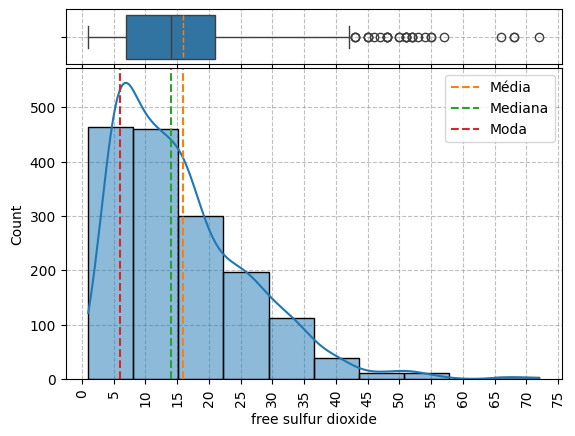

Coluna: total sulfur dioxide


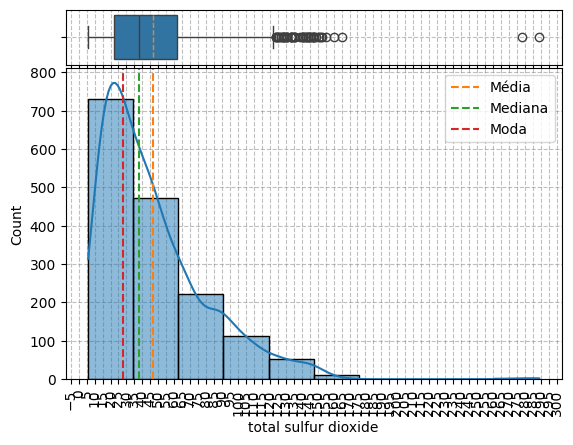

Coluna: density


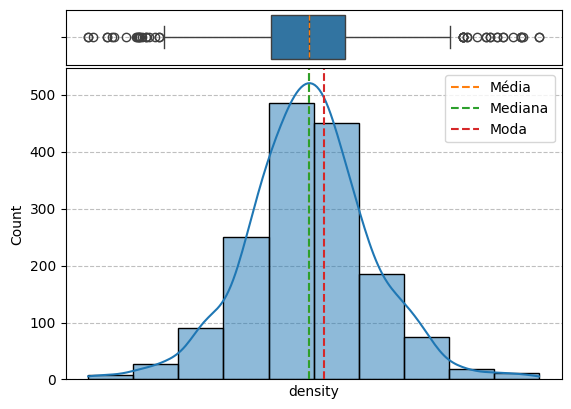

Coluna: pH


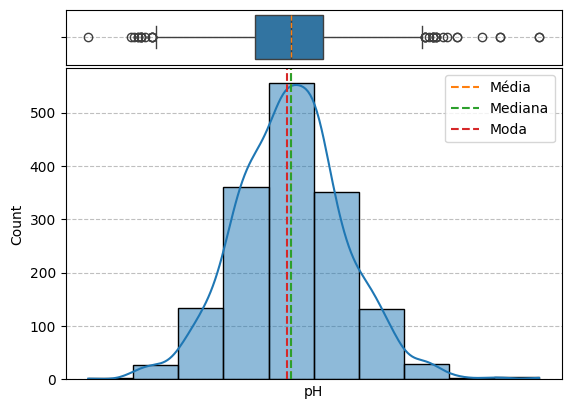

Coluna: sulphates


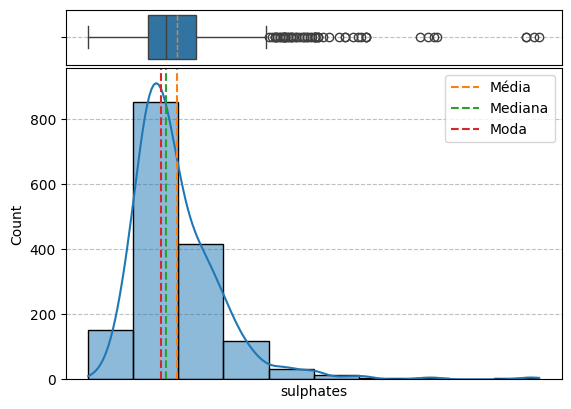

Coluna: alcohol


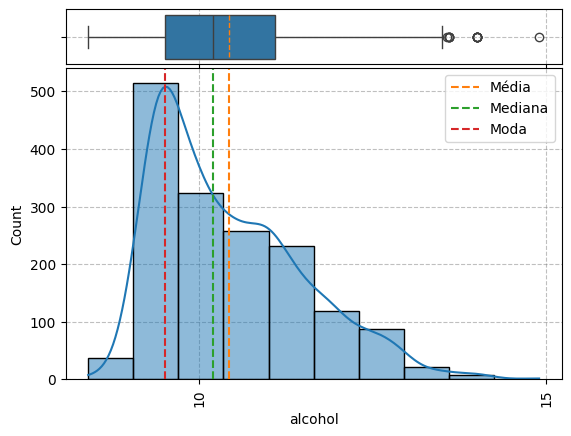

Coluna: quality


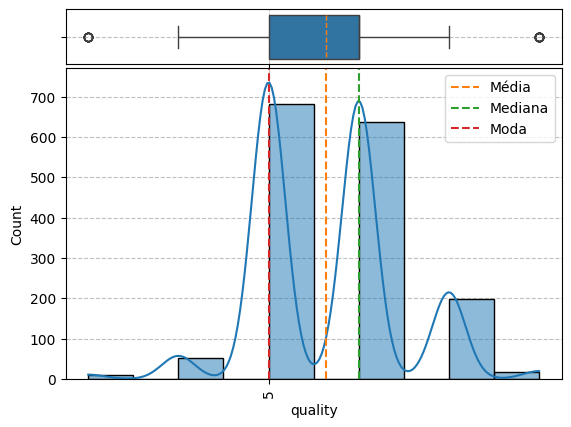

In [25]:
plot_all_columns(df)